## Import

In [1]:
!pip install -r requirements.txt --upgrade

  Using cached numpy-2.1.3-cp312-cp312-macosx_14_0_arm64.whl.metadata (62 kB)


In [2]:

# Datahandling

!pip install wordcloud

import requests
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wordcloud
import plotly.express as px





## Labeled data

In [6]:
data_labeled = pd.read_csv('predictions_output.csv')

In [7]:
data_labeled.head()

,Tweet_id,User_name,Screen_name,Tweet_text,Language,Hashtags,Created_at,Search_keyword,Label
0,1860719438225375240,Quality Stocks,Quality_stocksA,novo nordisk nvo one pager\n\n score 7910\n m...,en,[],2024-11-24 16:17:39+00:00,Novo Nordisk,0
1,1634584989638725632,The Investing for Beginners Podcast,IFB_podcast,137 todays shallow dive focuses on nvo novo no...,en,[],2023-03-11 16:00:05+00:00,Novo Nordisk,1
2,1862458532416590198,Oliver | MMMT Wealth (CPA),MMMTwealth,2 novo nordisk novo \n\nrevenue growth 26\nev...,en,[],2024-11-29 11:28:11+00:00,Novo Nordisk,1
3,1862578552488509669,Buck Parish,flatbush711,just another scam from the dirty communist bas...,en,[],2024-11-29 19:25:06+00:00,Novo Nordisk,1
4,1854236893749325830,Trung Phan,TrungTPhan,when you realize ozempic maker novo nordisk 47...,en,[],2024-11-06 18:58:20+00:00,Novo Nordisk,0


In [21]:
import pandas as pd
import plotly.express as px

# Basic Overview
def basic_eda(data):
    print("DataFrame Overview:")
    print("-" * 50)
    
    # Basic Information
    print("\n1. DataFrame Shape:")
    print(f"Total Rows: {data.shape[0]}")
    print(f"Total Columns: {data.shape[1]}")
    
    print("\n2. Column Information:")
    print(data.info())
    
    print("\n3. Missing Values:")
    print(data.isnull().sum())
    
    print("\n4. Basic Statistics for Numeric Columns:")
    print(data.describe())


# User Analysis - Focused on Top 10 Users
def user_analysis(data):
    print("\nUser Analysis:")
    print("-" * 50)
    
    # Top Users based on tweet count
    top_users = data['Screen_name'].value_counts().head(10)
    print("\nTop 10 Users by Tweet Count:")
    print(top_users)
    
    # Plotly Bar Chart for Top Users
    fig = px.bar(
        x=top_users.index, 
        y=top_users.values, 
        title='Top 10 Users by Tweet Count',
        labels={'x': 'User', 'y': 'Number of Tweets'},
        color=top_users.values,  # Optional: Color bar by tweet count
        color_continuous_scale='Viridis'  # Optional: Color scale
    )
    
    # Show the plot
    fig.show()


# Run the Basic EDA
basic_eda(data_labeled)

# Run User Analysis (focused on Top 10 Users)
user_analysis(data_labeled)


DataFrame Overview:
--------------------------------------------------

1. DataFrame Shape:
Total Rows: 238
Total Columns: 11

2. Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Tweet_id        238 non-null    int64 
 1   User_name       238 non-null    object
 2   Screen_name     238 non-null    object
 3   Tweet_text      238 non-null    object
 4   Language        238 non-null    object
 5   Hashtags        238 non-null    object
 6   Created_at      238 non-null    object
 7   Search_keyword  238 non-null    object
 8   Label           238 non-null    int64 
 9   Text_Length     238 non-null    int64 
 10  Hashtag_Count   238 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ KB
None

3. Missing Values:
Tweet_id          0
User_name         0
Screen_name       0
Tweet_text        0
Language         

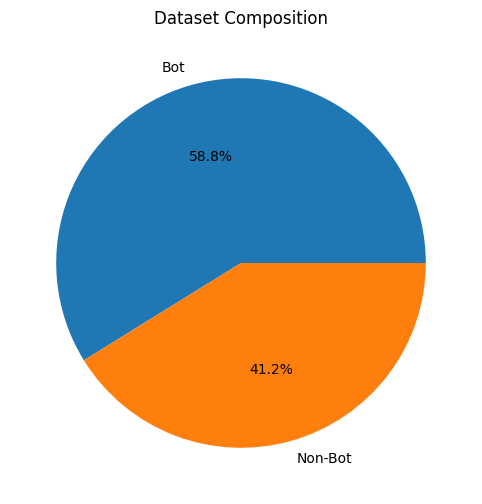


Dataset Composition:
Label
0    0.588235
1    0.411765
Name: proportion, dtype: float64


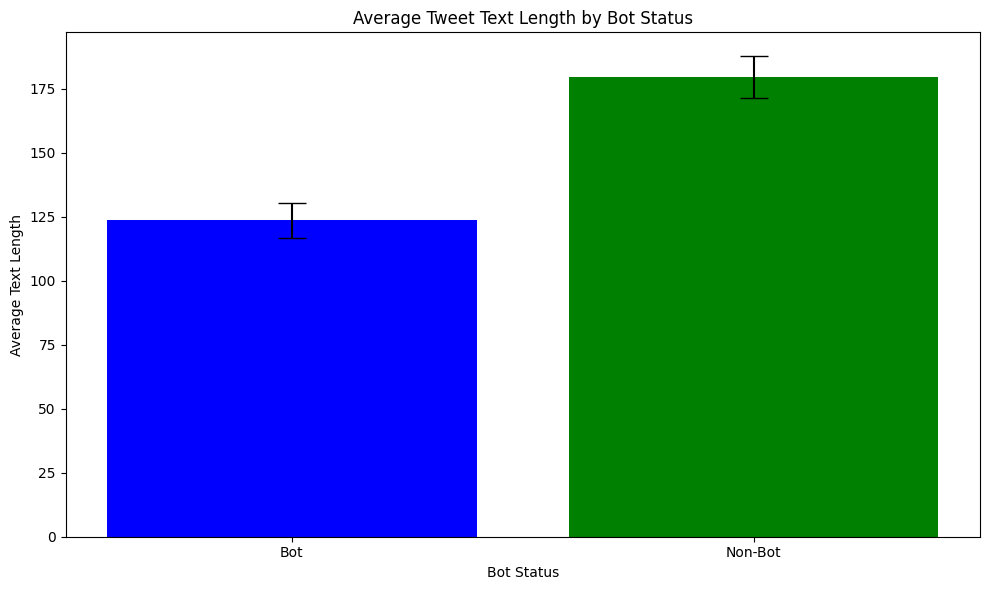


Text Length Statistics:
       count        mean        std   min    25%    50%     75%    max
Label                                                                 
0      140.0  123.485714  80.717242  16.0   59.0   99.5  188.00  280.0
1       98.0  179.357143  81.210081  25.0  103.5  192.0  258.75  277.0


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def detect_label_column(data):
    possible_columns = ['label', 'Label', 'Predicted_Label', 'bot_label']
    for col in possible_columns:
        if col in data.columns:
            return col
    raise ValueError("No label column found in the dataset")


def bot_eda(data):
    # Dynamically detect the label column
    label_column = detect_label_column(data)
    
    # 1. Dataset Composition
    def dataset_composition():
        plt.figure(figsize=(8, 6))
        label_counts = data[label_column].value_counts()
        plt.pie(label_counts, labels=['Bot', 'Non-Bot'], autopct='%1.1f%%')
        plt.title('Dataset Composition')
        plt.show()
        
        print("\nDataset Composition:")
        print(data[label_column].value_counts(normalize=True))
    
    # 2. Text Analysis
    def text_analysis():
        # Calculate text lengths
        data['Text_Length'] = data['Tweet_text'].str.len()
        
        plt.figure(figsize=(10, 6))
        # Group by label and calculate mean and standard error
        text_length_summary = data.groupby(label_column)['Text_Length'].agg(['mean', 'sem'])
        
        plt.bar(text_length_summary.index.map({0: 'Bot', 1: 'Non-Bot'}), 
                text_length_summary['mean'], 
                yerr=text_length_summary['sem'], 
                capsize=10,
                color=['blue', 'green'])
        
        plt.title('Average Tweet Text Length by Bot Status')
        plt.xlabel('Bot Status')
        plt.ylabel('Average Text Length')
        plt.tight_layout()
        plt.show()
        
        # Descriptive statistics of text length
        print("\nText Length Statistics:")
        print(data.groupby(label_column)['Text_Length'].describe())
    
    # Run all analyses
    dataset_composition()
    text_analysis()


# Execute EDA
bot_eda(data_labeled)


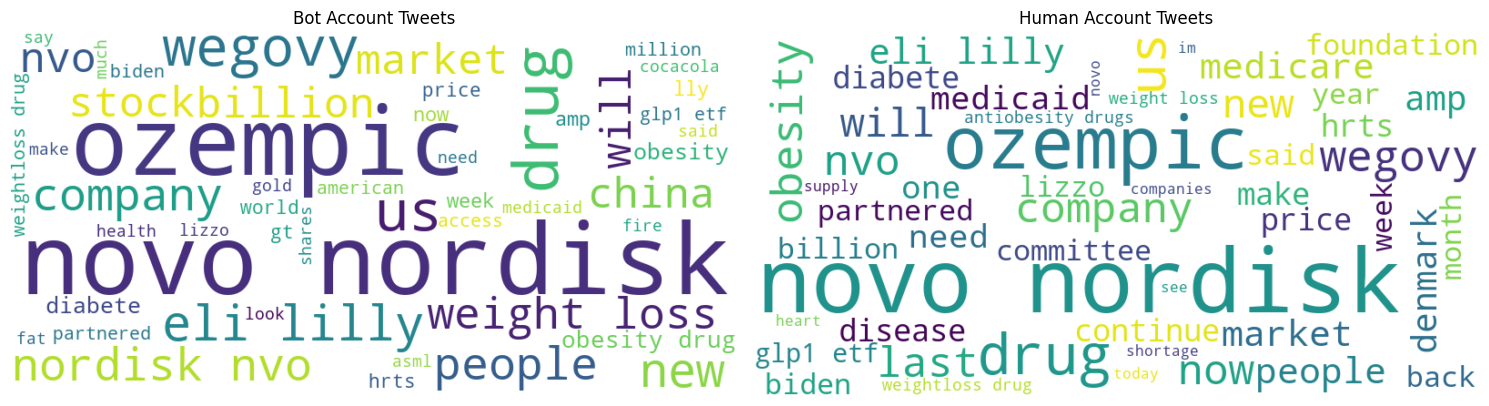

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# Ensure DataFrame is created correctly
df = pd.DataFrame(data_labeled)  # Assuming 'data_labeled' is your DataFrame

# Convert tweet texts to string
df['Tweet_text'] = df['Tweet_text'].astype(str)

# Group tweets by account and keep only unique ones
unique_tweets = df.groupby('User_name')['Tweet_text'].unique().apply(lambda x: ' '.join(x))

# Separate bot and human accounts
bot_accounts = df[df['Label'] == 0]['User_name']
human_accounts = df[df['Label'] == 1]['User_name']

# Get tweets for bot and human accounts
bot_tweets = unique_tweets[bot_accounts].drop_duplicates()
human_tweets = unique_tweets[human_accounts].drop_duplicates()

# Convert tweets to text for word cloud generation
bot_text = " ".join(bot_tweets)
human_text = " ".join(human_tweets)

# Create custom stopwords (optional)
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(['https', 'http', 'www', 'com'])

# Generate word clouds
bot_wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=custom_stopwords, 
    max_words=50
).generate(bot_text)

human_wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    stopwords=custom_stopwords, 
    max_words=50
).generate(human_text)

# Plot word clouds
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(bot_wordcloud, interpolation='bilinear')
plt.title('Bot Account Tweets')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(human_wordcloud, interpolation='bilinear')
plt.title('Human Account Tweets')
plt.axis('off')

plt.tight_layout()
plt.show()
